In [13]:
#load libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
import os
from IPython.display import Image
import folium
from sklearn.externals.six import StringIO
import pydotplus

In [14]:
#load data
parking = pd.read_csv('parking_classification.csv')

In [15]:
#show data
parking.head()

,parking_Occupied,parking_latitude,parking_longitude,parking_time,traffic_AmpelHardenbergstrvon-BHN2-Outbound_overall_Count,traffic_AmpelHardenbergstrvon-BHN2-Outbound_overall_Speed,traffic_AmpelHardenbergstrvon-BHN2-Outbound_car_Count,traffic_AmpelHardenbergstrvon-BHN2-Outbound_car_Speed,traffic_VorplatzHardenbergstrvon-BHN3-Inbound_overall_Count,traffic_VorplatzHardenbergstrvon-BHN3-Inbound_overall_Speed,...,wifi_Campus-BHN_Count1,wifi_Campus-BHN_Count2,wifi_Campus-AF-2_Count1,wifi_Campus-AF-2_Count2,wifi_Campus-EB_Count1,wifi_Campus-EB_Count2,pedestrian_CounterVorplatzGeb-AF2-PeopleCounter_IN_Count,pedestrian_CounterVorplatzGeb-AF2-PeopleCounter_OUT_Count,pedestrian_CounterHaupteingang-TEL4-PeopleCounter_IN_Count,pedestrian_CounterHaupteingang-TEL4-PeopleCounter_OUT_Count
0,1.0,52.512989,13.319484,1.516125e+12,17.0,0.0,17.0,0.0,19.0,1.0,...,11.0,0.0,136.0,42.0,7.0,0.0,0.0,0.0,0.0,0.0
1,0.0,52.512989,13.319484,1.516136e+12,21.0,0.0,21.0,0.0,10.0,2.0,...,4.0,5.0,134.0,19.0,5.0,1.0,0.0,0.0,1.0,0.0
2,1.0,52.512989,13.319484,1.516179e+12,2.0,5.0,2.0,5.0,10.0,3.0,...,9.0,6.0,158.0,33.0,6.0,6.0,0.0,0.0,0.0,0.0
3,0.0,52.512989,13.319484,1.516206e+12,24.0,0.0,24.0,0.0,8.0,3.0,...,11.0,0.0,123.0,38.0,3.0,0.0,0.0,0.0,1.0,1.0
4,1.0,52.512989,13.319484,1.516206e+12,8.0,1.0,8.0,1.0,26.0,1.0,...,7.0,4.0,126.0,35.0,4.0,0.0,0.0,0.0,1.0,0.0


In [16]:
#show all parking spots on the map
latlon = parking[['parking_latitude', 'parking_longitude']]
latlon = latlon.drop_duplicates()
parking_spot_coordinates = latlon.values

m = folium.Map(location=[52.5126276,13.3196874], zoom_start=17)
for coordinate in parking_spot_coordinates:
    folium.Marker(coordinate, popup='<i>Parking</i>').add_to(m)
m


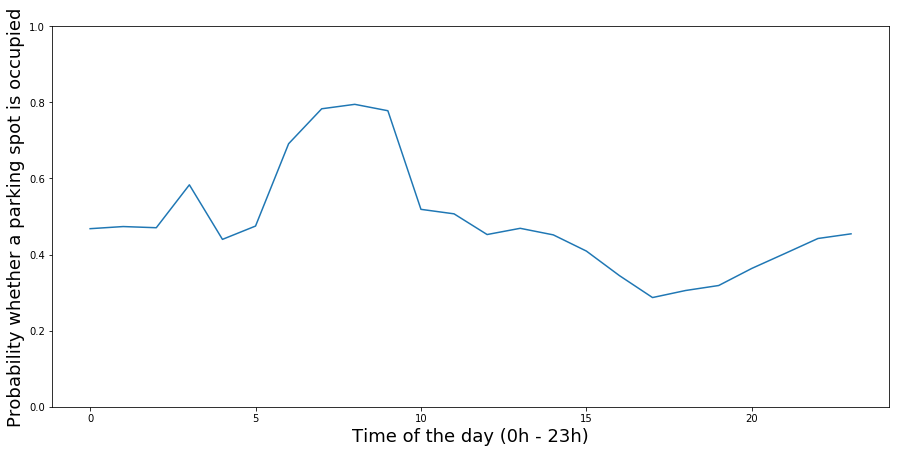

In [17]:
# transform timestamp into datetime
parking['parking_date'] = parking['parking_time'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
parking.set_index('parking_date', inplace=True)

aggregated = parking['parking_Occupied'].groupby([parking.index.hour]).mean().reset_index().values

#show parking situation over time
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(aggregated[:,0], aggregated[:,1])
plt.xlabel("Time of the day (0h - 23h)", fontsize=18)
plt.ylabel("Probability whether a parking spot is occupied", fontsize=18)
plt.ylim((0.0, 1.0)) 
plt.show()


In [18]:
#separate feature matrix from target vector
X = parking.values[:, 1:parking.shape[1]]
target = parking.values[:, 0]

In [19]:
#train decision tree using cross-validation and grid search
clf = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=4)
clf = clf.fit(X, target)

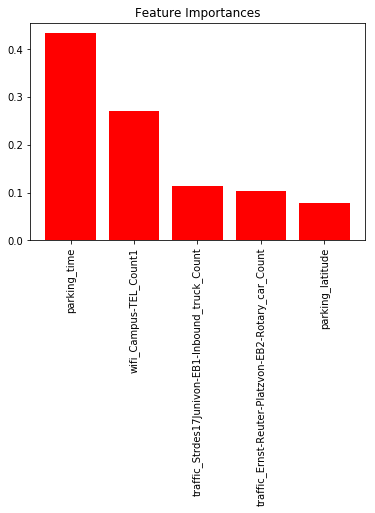

In [20]:
#plot most important feartures
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

k = 5
feature_names = parking.columns[1:]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(k), importances[indices][:k], color="r", align="center")
plt.xticks(range(k), feature_names[indices][:k], rotation='vertical')
plt.show()

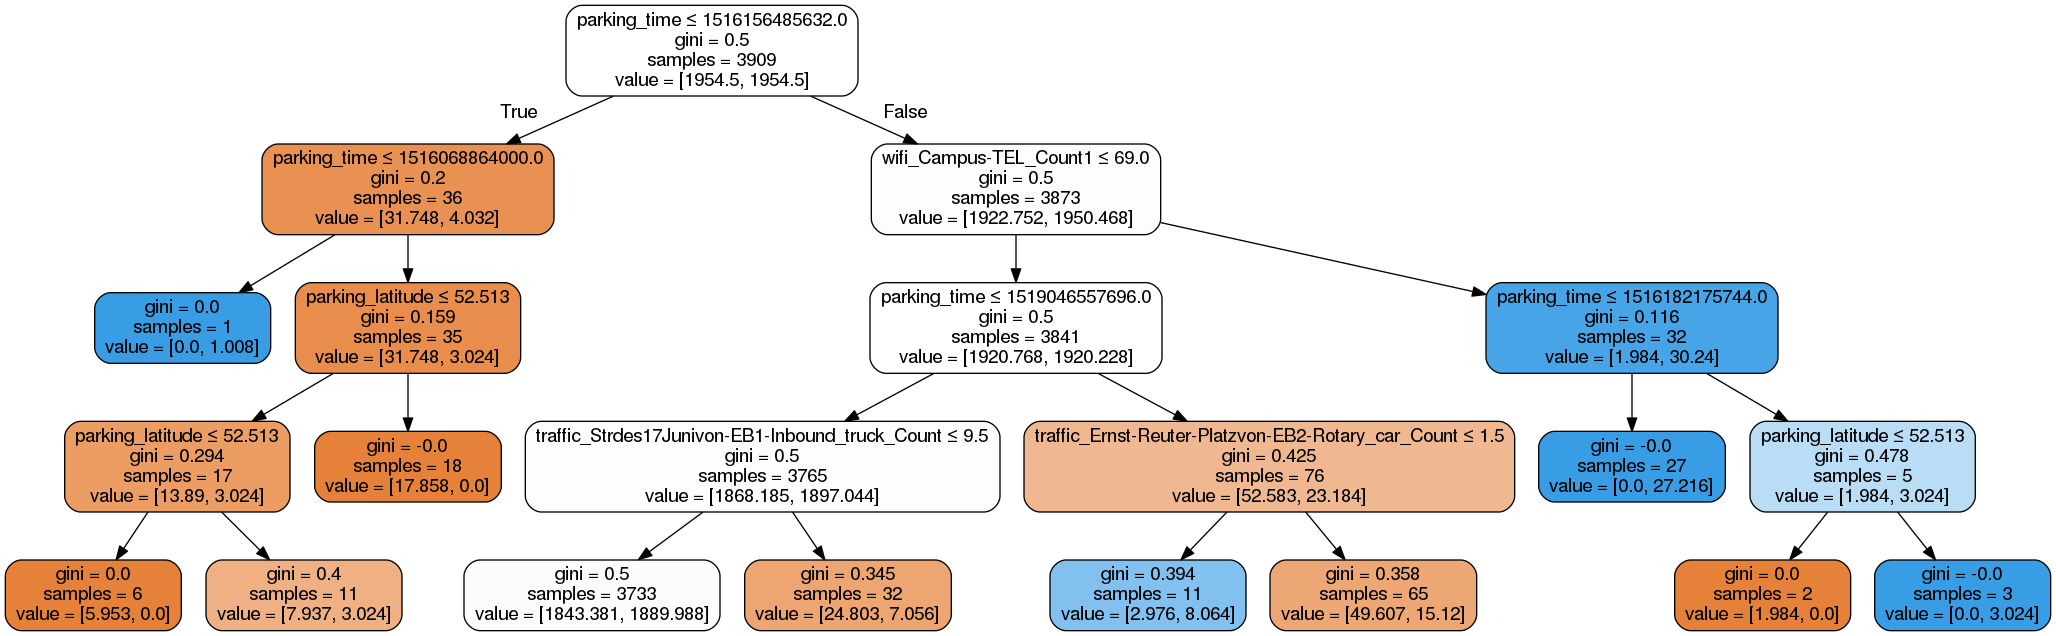

In [22]:
#show decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())